In [1]:
#Importing Required Libraries and converting the dataset into dataframe object using "pandas" python data analysis library.

import numpy as np
import pandas as pd
from sklearn import preprocessing
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
df = pd.read_csv('covid_dataset.csv',low_memory=False)
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,4/30/2020,0,0,0,0,0,negative,None,female,Other
1,4/30/2020,1,0,0,0,0,negative,None,female,Other
2,4/30/2020,0,1,0,0,0,negative,None,male,Other
3,4/30/2020,1,0,0,0,0,negative,None,female,Other
4,4/30/2020,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,3/11/2020,0,0,0,0,0,negative,None,None,Other
278844,3/11/2020,0,0,0,0,0,negative,None,None,Other
278845,3/11/2020,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,3/11/2020,0,0,0,0,0,other,None,None,Other


In [2]:
# Printing the first 10 rows of the dataframe

pd.options.display.max_columns = 100
df.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,4/30/2020,0,0,0,0,0,negative,None,female,Other
1,4/30/2020,1,0,0,0,0,negative,None,female,Other
2,4/30/2020,0,1,0,0,0,negative,None,male,Other
3,4/30/2020,1,0,0,0,0,negative,None,female,Other
4,4/30/2020,1,0,0,0,0,negative,None,male,Other
5,4/30/2020,1,0,0,0,0,negative,None,female,Other
6,4/30/2020,1,1,0,0,0,negative,None,male,Abroad
7,4/30/2020,0,0,0,0,0,negative,None,female,Other
8,4/30/2020,0,0,0,0,0,negative,None,male,Other
9,4/30/2020,0,0,0,0,0,negative,None,male,Contact with confirmed


In [3]:
#The dataframe consists of around 278848 instances, 9(independent features), 1(target feature)
df.shape

(278848, 10)

In [4]:
#Calculating the percentage of missing values in all columns
missing_value_percentage = df.isna().mean().round(4)*100
missing_value_percentage

test_date              0.0
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          0.0
age_60_and_above       0.0
gender                 0.0
test_indication        0.0
dtype: float64

In [5]:
#Now, we are printing the unique values of 'age_60_and_above' column
df['age_60_and_above'].drop_duplicates()

0         None
122808     Yes
122809      No
Name: age_60_and_above, dtype: object

In [6]:
#Here, we can use label encoding to covert the different categories of age_60_and_above column to numerical format

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder1 = preprocessing.LabelEncoder()
df['age_60_and_above'] = label_encoder1.fit_transform(df['age_60_and_above']) 

In [7]:
#Here, we are label encoding cough, fever, sore_throat, shortness_of_breath and headache columns to int data type.
label_encoder2= preprocessing.LabelEncoder()
df['cough']= label_encoder2.fit_transform(df['cough'])

label_encoder3 = preprocessing.LabelEncoder()
df['fever'] = label_encoder3.fit_transform(df['fever'])

label_encoder4 = preprocessing.LabelEncoder()
df['sore_throat'] = label_encoder4.fit_transform(df['sore_throat'])

label_encoder5 = preprocessing.LabelEncoder()
df['shortness_of_breath'] = label_encoder5.fit_transform(df['shortness_of_breath'])

label_encoder6 = preprocessing.LabelEncoder()
df['head_ache'] = label_encoder6.fit_transform(df['head_ache'])

In [8]:
# Identifying different categories in gender column

df['gender'].drop_duplicates()

0     female
2       male
51      None
Name: gender, dtype: object

In [9]:
# Also, here we can use label encoding to convert the different categories of gender into numerical format

label_encoder2 = preprocessing.LabelEncoder()
df['gender'] = label_encoder2.fit_transform(df['gender'])

In [10]:
# Identifying different scenarios in test_indication column

df['test_indication'].drop_duplicates()

0                     Other
6                    Abroad
9    Contact with confirmed
Name: test_indication, dtype: object

In [11]:
# Implementing label encoding to convert the different categories of 'test_indication' into numerical format.

label_encoder3 = preprocessing.LabelEncoder()
df['test_indication']= label_encoder3.fit_transform(df['test_indication'])

In [12]:
#Converting string date to date-time
import datetime as dt
df['test_date'] = pd.to_datetime(df['test_date'])
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,1,1,2
1,2020-04-30,1,0,0,0,0,negative,1,1,2
2,2020-04-30,0,1,0,0,0,negative,1,2,2
3,2020-04-30,1,0,0,0,0,negative,1,1,2
4,2020-04-30,1,0,0,0,0,negative,1,2,2


In [13]:
# Converting date-time to ordinal
df['test_date'] = df['test_date'].map(dt.datetime.toordinal)
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,737545,0,0,0,0,0,negative,1,1,2
1,737545,1,0,0,0,0,negative,1,1,2
2,737545,0,1,0,0,0,negative,1,2,2
3,737545,1,0,0,0,0,negative,1,1,2
4,737545,1,0,0,0,0,negative,1,2,2


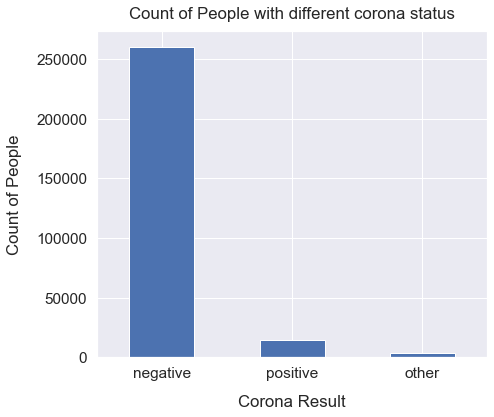

In [14]:
# Calculating and Representing the count of categorical variables positive & negative of the 'corona_result' class with the help of "bar chart"
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
df['corona_result'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Corona Result", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People with different corona status", y=1.02);

In [15]:
# Here we can observe that negligible amount of people got corona_status as other. So, we can remove the rows which contain the "other" value.
indexNames = df[(df['corona_result'] == 'other')].index
df.drop(indexNames , inplace=True)
df.to_excel (r'C:\Users\S.D.Harish\Desktop\export_dataframe.xlsx', index = False, header=True)

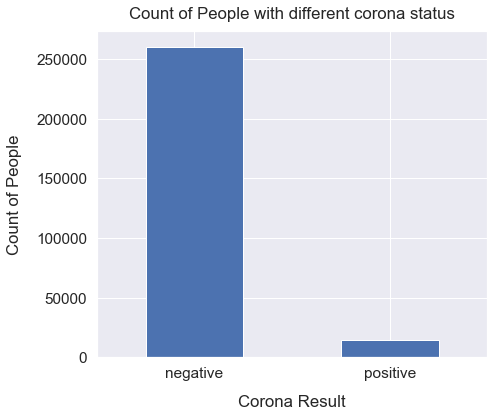

In [16]:
# Calculating and Representing the count of categorical variables positive & negative of the 'corona_result' class with the help of "bar chart"
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
df['corona_result'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Corona Result", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People with different corona status", y=1.02);

In [17]:
# Implementing label encoding to convert the different categories of 'corona_result' into numerical format.

label_encoder4 = preprocessing.LabelEncoder()
df['corona_result']= label_encoder4.fit_transform(df['corona_result'])

### Creating dependent and independent features

In [18]:
columns = df.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["corona_result"]]
# Storing the variable we are predicting 
target = "corona_result"
# Defining a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(274956, 9)
(274956,)


In [19]:
df.dtypes

test_date              int64
cough                  int32
fever                  int32
sore_throat            int32
shortness_of_breath    int32
head_ache              int32
corona_result          int32
age_60_and_above       int32
gender                 int32
test_indication        int32
dtype: object

In [20]:
#Splitting the dataset into training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

### Calculating Accuracy, F1 score and Run Time using KNN distance-based model

In [21]:
import time
knn_start_time = time.time()
#Importing the libraries essential for the knn model classifier
from sklearn.neighbors import KNeighborsClassifier
#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
#Fitting the model into training data
knn_model = KNeighborsClassifier(n_neighbors= 1)
knn_model.fit(X_train,y_train)
#Model prediction on test data
knn_prediction = knn_model.predict(X_test)
#Determining the Sensitivity and Specificity
#Predicting the probabilities on test data
knn_probs = knn_model.predict_proba(X_test)
#Keeping only the positive class
knn_probs = knn_probs[:, 1]
#Computation of AUC Scores
knn_auc = roc_auc_score(y_test, knn_probs)
#Printing Accuracy Score
print("KNN Accuracy Score:",metrics.accuracy_score(knn_prediction,y_test))
#Printing F-measure
print("KNN F-measure:",metrics.f1_score(y_test,knn_prediction))
#Printing Run time
knn_model_runtime = time.time()-(knn_start_time)
print("KNN Runtime : %s seconds" %(knn_model_runtime))

KNN Accuracy Score: 0.9456156727726793
KNN F-measure: 0.508760402978537
KNN Runtime : 83.56466555595398 seconds


In [22]:
from sklearn.metrics import confusion_matrix
knn_confusion_matrix= confusion_matrix(y_test,knn_prediction)
print(knn_confusion_matrix)

[[75678  2353]
 [ 2133  2323]]


<AxesSubplot:>

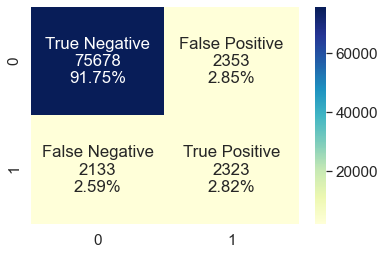

In [23]:
#Visualizing the Confusion Matrix using "seaborn" library
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                knn_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     knn_confusion_matrix.flatten()/np.sum(knn_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_confusion_matrix, annot=labels, fmt='', cmap='YlGnBu')

In [24]:
knn_total=sum(sum(knn_confusion_matrix))
#Sensitivity
knn_sensitivity = knn_confusion_matrix[1,1]/(knn_confusion_matrix[1,1]+knn_confusion_matrix[1,0])
print("KNN Sensitivity :",knn_sensitivity)
#Specificity
knn_specificity = knn_confusion_matrix[0,0]/(knn_confusion_matrix[0,0]+knn_confusion_matrix[0,1])
print("KNN Specificity :",knn_specificity)

KNN Sensitivity : 0.5213195691202872
KNN Specificity : 0.969845317886481


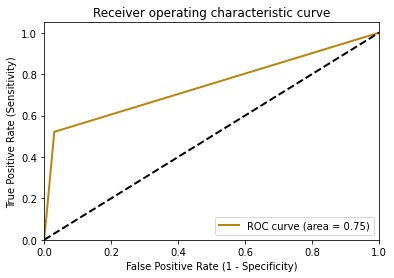

In [25]:
import seaborn
seaborn.reset_orig()
from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs)
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkgoldenrod',
         lw=lw, label='ROC curve (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
import time
decisiontree_start_time = time.time()
#Importing the libraries essential for the decisiontree model classifier
from sklearn.tree import DecisionTreeClassifier
#Fitting the model into training data
decisiontree_model = DecisionTreeClassifier(random_state=999)
decisiontree_model.fit(X_train,y_train)
#Model prediction on test data
decisiontree_prediction = decisiontree_model.predict(X_test)
#Determining the Sensitivity and Specificity
#Predicting the probabilities on test data
decisiontree_probs = decisiontree_model.predict_proba(X_test)
#Keeping only the positive class
decisiontree_probs = decisiontree_probs[:, 1]
#Computation of AUC Scores
decisiontree_auc = roc_auc_score(y_test, decisiontree_probs)
#Printing Accuracy Score
print("DECISIONTREE Accuracy Score:",metrics.accuracy_score(decisiontree_prediction,y_test))
#Printing F-measure
print("DECISIONTREE F-measure:",metrics.f1_score(y_test,decisiontree_prediction))
#Printing Run time
decisiontree_model_runtime = time.time()-(decisiontree_start_time)
print("DECISIONTREE Runtime : %s seconds" %(decisiontree_model_runtime))

DECISIONTREE Accuracy Score: 0.9690981609223271
DECISIONTREE F-measure: 0.6706292802687687
DECISIONTREE Runtime : 1.3506646156311035 seconds


In [27]:
from sklearn.metrics import confusion_matrix
decisiontree_confusion_matrix= confusion_matrix(y_test,decisiontree_prediction)
print(decisiontree_confusion_matrix)

[[77343   688]
 [ 1861  2595]]


<AxesSubplot:>

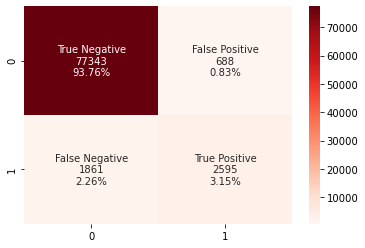

In [28]:
#Visualizing the Confusion Matrix using "seaborn" library
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
               decisiontree_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     decisiontree_confusion_matrix.flatten()/np.sum(decisiontree_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(decisiontree_confusion_matrix, annot=labels, fmt='', cmap='Reds')

In [29]:
decisiontree_total=sum(sum(decisiontree_confusion_matrix))
#Sensitivity
decisiontree_sensitivity = decisiontree_confusion_matrix[1,1]/(decisiontree_confusion_matrix[1,1]+decisiontree_confusion_matrix[1,0])
print("DECISIONTREE Sensitivity :",decisiontree_sensitivity)
#Specificity
decisiontree_specificity = decisiontree_confusion_matrix[0,0]/(decisiontree_confusion_matrix[0,0]+decisiontree_confusion_matrix[0,1])
print("DECISIONTREE Specificity :",decisiontree_specificity)

DECISIONTREE Sensitivity : 0.5823608617594255
DECISIONTREE Specificity : 0.9911829913752227


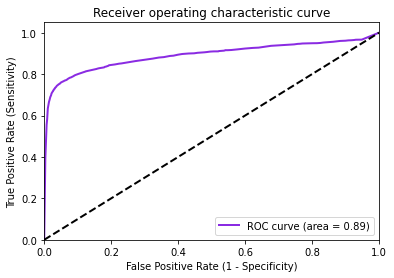

In [30]:
import seaborn
seaborn.reset_orig()
from sklearn.metrics import roc_curve
decisiontree_fpr, decisiontree_tpr, thresholds = roc_curve(y_test, decisiontree_probs)
lw = 2
plt.plot(decisiontree_fpr, decisiontree_tpr, color='blueviolet',
         lw=lw, label='ROC curve (area = %0.2f)' % decisiontree_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
import time
naivebayes_start_time = time.time()
#Importing the libraries essential for the naivebayes model classifier
from sklearn.naive_bayes import GaussianNB
#Fitting the model into training data
naivebayes_model = GaussianNB(np.random.seed(999))
naivebayes_model.fit(X_train,y_train)
#Model prediction on test data
naivebayes_prediction = naivebayes_model.predict(X_test)
#Determining the Sensitivity and Specificity
#Predicting the probabilities on test data
naivebayes_probs = naivebayes_model.predict_proba(X_test)
#Keeping only the positive class
naivebayes_probs = naivebayes_probs[:, 1]
#Computation of AUC Scores
naivebayes_auc = roc_auc_score(y_test, naivebayes_probs)
#Printing Accuracy Score
print("NAIVEBAYES Accuracy Score:",metrics.accuracy_score(naivebayes_prediction,y_test))
#Printing F-measure
print("NAIVEBAYES F-measure:",metrics.f1_score(y_test,naivebayes_prediction))
#Printing Run time
naivebayes_model_runtime = time.time()-(naivebayes_start_time)
print("NAIVEBAYES Runtime : %s seconds" %(naivebayes_model_runtime))

NAIVEBAYES Accuracy Score: 0.9380508443754774
NAIVEBAYES F-measure: 0.32745459331403004
NAIVEBAYES Runtime : 0.4299952983856201 seconds


In [32]:
from sklearn.metrics import confusion_matrix
naivebayes_confusion_matrix= confusion_matrix(y_test,naivebayes_prediction)
print(naivebayes_confusion_matrix)

[[76133  1898]
 [ 3212  1244]]


<AxesSubplot:>

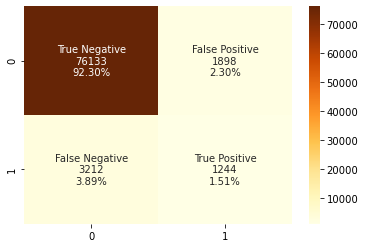

In [33]:
#Visualizing the Confusion Matrix using "seaborn" library
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                naivebayes_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     naivebayes_confusion_matrix.flatten()/np.sum(naivebayes_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(naivebayes_confusion_matrix, annot=labels, fmt='', cmap='YlOrBr')

In [34]:
naivebayes_total=sum(sum(naivebayes_confusion_matrix))
#Sensitivity
naivebayes_sensitivity = naivebayes_confusion_matrix[1,1]/(naivebayes_confusion_matrix[1,1]+naivebayes_confusion_matrix[1,0])
print("NAIVEBAYES Sensitivity :",naivebayes_sensitivity)
#Specificity
naivebayes_specificity = naivebayes_confusion_matrix[0,0]/(naivebayes_confusion_matrix[0,0]+naivebayes_confusion_matrix[0,1])
print("NAIVEBAYES Specificity :",naivebayes_specificity)

NAIVEBAYES Sensitivity : 0.2791741472172352
NAIVEBAYES Specificity : 0.9756763337647858


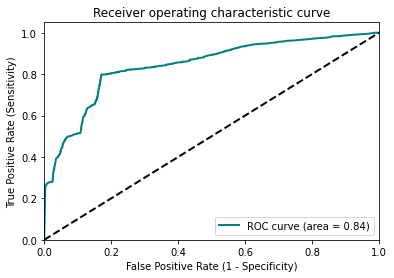

In [35]:
import seaborn
seaborn.reset_orig()
from sklearn.metrics import roc_curve
naivebayes_fpr, naivebayes_tpr, thresholds = roc_curve(y_test, naivebayes_probs)
lw = 2
plt.plot(naivebayes_fpr, naivebayes_tpr, color='teal',
         lw=lw, label='ROC curve (area = %0.2f)' % naivebayes_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
import time
extremetrees_start_time = time.time()
#Importing the libraries essential for the extremetrees model classifier
from sklearn.ensemble import ExtraTreesClassifier
#Fitting the model into training data
extremetrees_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
extremetrees_model.fit(X_train,y_train)
#Model prediction on test data
extremetrees_prediction = extremetrees_model.predict(X_test)
#Determining the Sensitivity and Specificity
#Predicting the probabilities on test data
extremetrees_probs = extremetrees_model.predict_proba(X_test)
#Keeping only the positive class
extremetrees_probs = extremetrees_probs[:, 1]
#Computation of AUC Scores
extremetrees_auc = roc_auc_score(y_test, extremetrees_probs)
#Printing Accuracy Score
print("EXTREMETREES Accuracy Score:",metrics.accuracy_score(extremetrees_prediction,y_test))
#Printing F-measure
print("EXTREMETREES F-measure:",metrics.f1_score(y_test,extremetrees_prediction))
#Printing Run time
extremetrees_model_runtime = time.time()-(extremetrees_start_time)
print("EXTREMETREES Runtime : %s seconds" %(extremetrees_model_runtime))

EXTREMETREES Accuracy Score: 0.9692557615139356
EXTREMETREES F-measure: 0.6734483646664949
EXTREMETREES Runtime : 28.02875852584839 seconds


In [37]:
from sklearn.metrics import confusion_matrix
extremetrees_confusion_matrix= confusion_matrix(y_test,extremetrees_prediction)
print(extremetrees_confusion_matrix)

[[77336   695]
 [ 1841  2615]]


<AxesSubplot:>

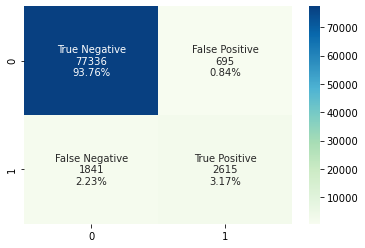

In [38]:
#Visualizing the Confusion Matrix using "seaborn" library
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
               extremetrees_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     extremetrees_confusion_matrix.flatten()/np.sum(extremetrees_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(extremetrees_confusion_matrix, annot=labels, fmt='', cmap='GnBu')

In [39]:
extremetrees_total=sum(sum(extremetrees_confusion_matrix))
#Sensitivity
extremetrees_sensitivity = extremetrees_confusion_matrix[1,1]/(extremetrees_confusion_matrix[1,1]+extremetrees_confusion_matrix[1,0])
print("EXTREMETREES Sensitivity :",extremetrees_sensitivity)
#Specificity
extremetrees_specificity = extremetrees_confusion_matrix[0,0]/(extremetrees_confusion_matrix[0,0]+extremetrees_confusion_matrix[0,1])
print("EXTREMETREES Specificity :",extremetrees_specificity)

EXTREMETREES Sensitivity : 0.5868491921005387
EXTREMETREES Specificity : 0.9910932834386333


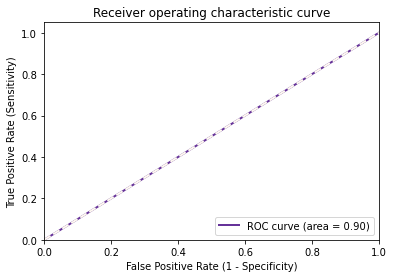

In [40]:
import seaborn
seaborn.reset_orig()
from sklearn.metrics import roc_curve
ExtremeTrees_fpr, ExtremeTrees_tpr, thresholds = roc_curve(y_test, extremetrees_probs)
lw = 2
plt.plot(ExtremeTrees_fpr, ExtremeTrees_fpr, color='rebeccapurple',
         lw=lw, label='ROC curve (area = %0.2f)' % extremetrees_auc)
plt.plot([0, 1], [0, 1], color='floralwhite', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

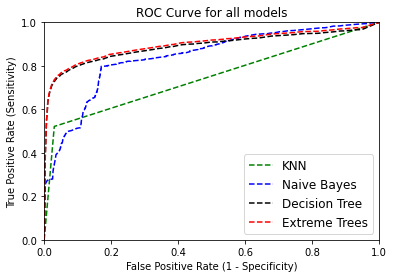

In [43]:
import seaborn
seaborn.reset_orig()
# matplotlib
import matplotlib.pyplot as plt
# plotting roc curves
plt.plot(knn_fpr, knn_tpr, linestyle='--',color='green', label='KNN')
plt.plot(naivebayes_fpr, naivebayes_tpr, linestyle='--',color='blue', label='Naive Bayes')
plt.plot(decisiontree_fpr, decisiontree_tpr, linestyle='--', color='black',label='Decision Tree')
plt.plot(ExtremeTrees_fpr, ExtremeTrees_tpr, linestyle='--', color='red', label='Extreme Trees')
# title
plt.title('ROC Curve for all models')
# x label
plt.xlabel('False Positive Rate (1 - Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 12 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = "lower right")
plt.show(); 